In [17]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [18]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [19]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, desc

In [20]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [21]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [22]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [23]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [24]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [25]:
# Find the most recent date in the data set.
last_date_raw = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
last_date_raw


('2017-08-23',)

2016-08-23


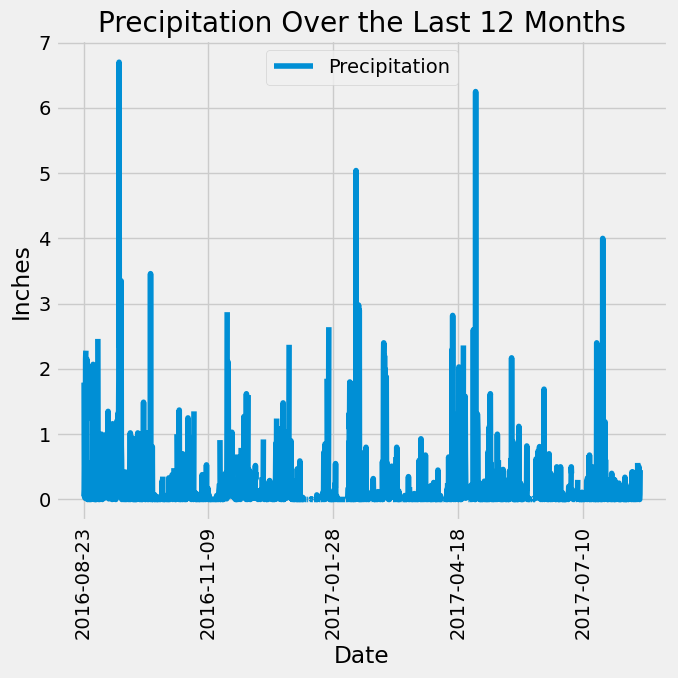

In [26]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
#last_date = dt.date(2017, 8, 23) or dynamic calculation as below
last_date = dt.date(int(last_date_raw[0][0:4]),int(last_date_raw[0][5:7]), int(last_date_raw[0][8:]))

# Calculate the date one year from the last date in data set.
year_ago = last_date - dt.timedelta(days=365)
print(year_ago)

# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= '2016-08-23').all()

last_yr_prcp_data = [{"Date": result[0], "Precipitation": result[1]} for result in results]

# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_df = pd.DataFrame(last_yr_prcp_data, columns=['Date', 'Precipitation'])

# Sort the dataframe by date
prcp_df.sort_values(by='Date', inplace=True)


# Use Pandas Plotting with Matplotlib to plot the data

figure_bar = prcp_df.plot(x = 'Date', y = 'Precipitation', figsize = (7, 7), ylabel='Inches', title='Precipitation Over the Last 12 Months')

plt.legend(loc='upper center')
 
plt.xticks(rotation= "vertical", ha='center' )

plt.tight_layout()

plt.show()

In [27]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [28]:
# Design a query to calculate the total number of stations in the dataset
station_count= session.query(func.count(Measurement.station.distinct())).all()
station_count


[(9,)]

In [29]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_counts = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(desc(func.count(Measurement.station))).all()
station_counts

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [30]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
station_stats = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()

station_stats


[(54.0, 85.0, 71.66378066378067)]

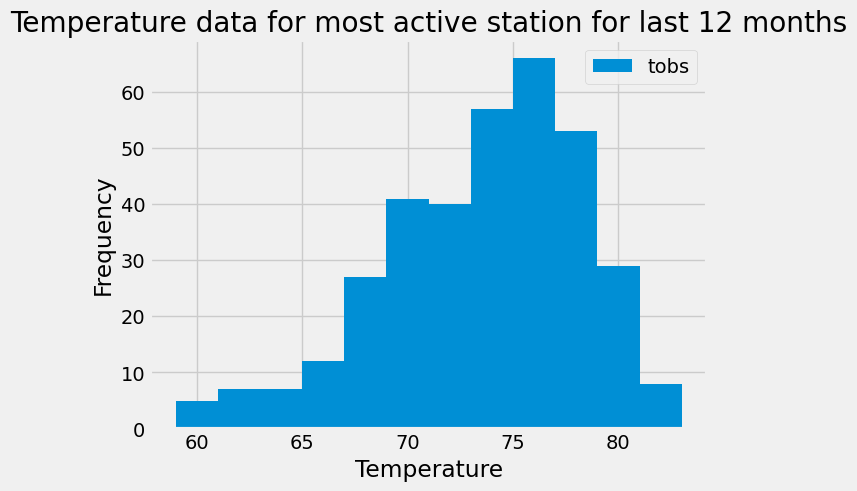

In [31]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query( Measurement.tobs, Measurement.date).filter(Measurement.date >= year_ago).filter(Measurement.station == 'USC00519281').all()
last_yr_tobs_data = [{"Temperature": result[0]} for result in results]
tobs_df= pd.DataFrame(last_yr_tobs_data, columns=['Temperature'] )

temp= tobs_df["Temperature"]
plt.hist(temp, bins=12, label = 'tobs')
plt.legend(loc='best')
plt.xlabel("Temperature")
plt.ylabel("Frequency")

plt.title("Temperature data for most active station for last 12 months")
plt.show()

# Close Session

In [32]:
# Close Session
session.close()